In [1]:
# Add matplotlib magic command
%matplotlib inline

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
# Prep files and paths
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
# read city data file
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# read ride data file
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# check city data file for nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# check city data file for data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# check city data file for total data points
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# what values are used in the type column?
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# find sum of data points per type 
print(sum(city_data_df['type']=='Urban'), 
sum(city_data_df['type']=='Suburban'),
sum(city_data_df['type']=='Rural'))

66 36 18


In [10]:
# check ride data file for nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# check ride data file for data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# merge dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
# create a dataframe for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df["type"] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [31]:
# DF1: find total number of rides for each city by city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(["city"]).count()['ride_id']

In [34]:
# DF2: average fares for each city by city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']


In [36]:
# DF3: find average number of drivers by city type
urban_avg_driver = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_avg_driver = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_avg_driver = rural_cities_df.groupby(['city']).mean()['driver_count']

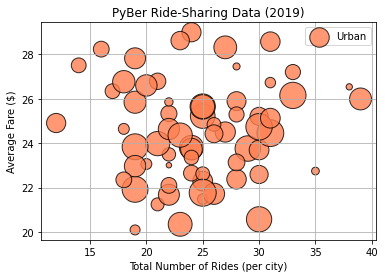

In [46]:
# bubble plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,c="coral",s=urban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

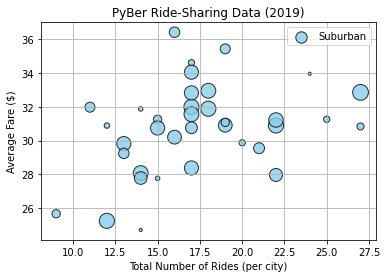

In [48]:
# bubble plot for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare,c="skyblue",s=suburban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

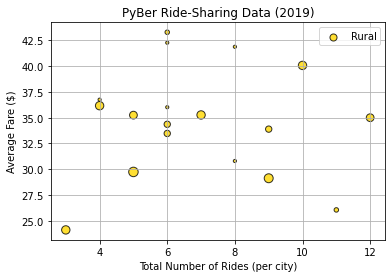

In [49]:
# bubble plot for rural cities
plt.scatter(rural_ride_count,rural_avg_fare,c="gold",s=rural_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

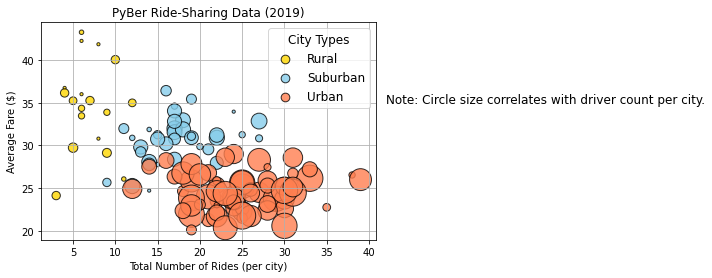

In [59]:
# run each city type chart in one cell to merge

# bubble plot for rural cities
plt.scatter(rural_ride_count,rural_avg_fare,c="gold",s=rural_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Rural')

# bubble plot for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare,c="skyblue",s=suburban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Suburban')

# bubble plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,c="coral",s=urban_avg_driver*10, alpha=0.8, edgecolor='black', linewidths=1, label='Urban')

# other graph properties
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

plt.show()

